In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

import pandas as pd
from datetime import datetime

import os
import ipywidgets as widgets

import tkinter as tk
from tkinter import filedialog as fd

In [470]:
# open file dialog
root = tk.Tk()
root.attributes('-topmost', True)
root.iconify()
file_name = fd.askopenfilename(parent=root, filetypes=[(".shp", ".shp")])
root.destroy()

In [471]:
file_name

'D:/BISMARK/GESTION_2023/_TEST/shp/Propiedad20.shp'

In [472]:
# leer el .shp seleccionado
data = gpd.read_file(file_name)

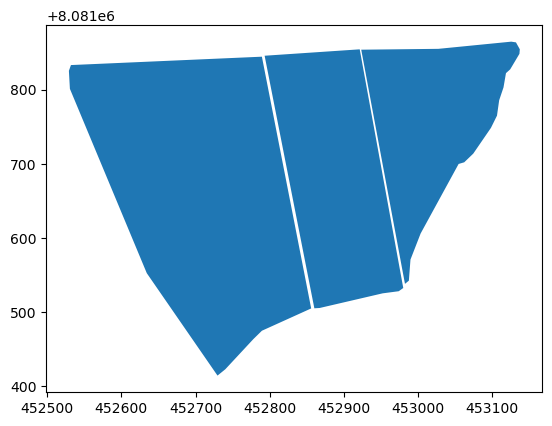

In [473]:
data.plot()
plt.show()

In [474]:
data

,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,textura,soca,cultivo,zona,area,geometry
0,0000220000L5,22,EL_FAISAN_DEL_QUINACHI--LEANDRO_CABRERA,6638,CABRERA_LOMBARDI_LEANDRO_JAVIER,L5,CITTCA_85-22,2017-05-06,FA,5,canha,50,8.67,"POLYGON Z ((452789.516 8081844.592 0.000, 4528..."
1,0000220000L4.1,22,EL_FAISAN_DEL_QUINACHI--LEANDRO_CABRERA,6638,CABRERA_LOMBARDI_LEANDRO_JAVIER,L4.1,CITTCA_85-22,2019-05-15,FA,3,canha,50,4.24,"POLYGON Z ((452793.207 8081845.886 0.000, 4529..."
2,0000220000L4.2,22,EL_FAISAN_DEL_QUINACHI--LEANDRO_CABRERA,1447,CABRERA_CAROLINA_CRONENBOLD_DE,L4.2,UCG_90-20,2020-05-15,FY,2,canha,50,3.40,"POLYGON Z ((452987.727 8081542.553 0.000, 4529..."


In [475]:
data.crs.name

'WGS 84 / UTM zone 20S'

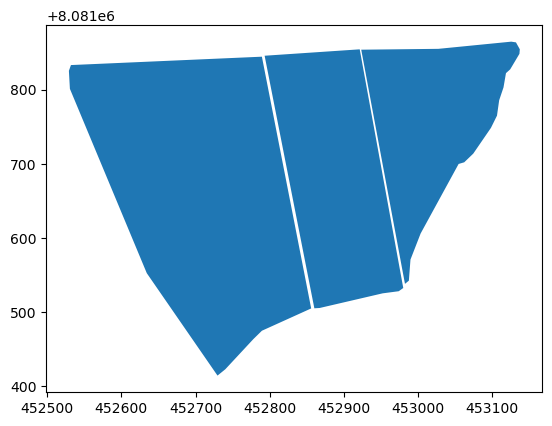

In [476]:
propiedad = data[data['unidad_01']==22]
propiedad.plot()
plt.show()

In [477]:
propiedad.head(3)

,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,textura,soca,cultivo,zona,area,geometry
0,0000220000L5,22,EL_FAISAN_DEL_QUINACHI--LEANDRO_CABRERA,6638,CABRERA_LOMBARDI_LEANDRO_JAVIER,L5,CITTCA_85-22,2017-05-06,FA,5,canha,50,8.67,"POLYGON Z ((452789.516 8081844.592 0.000, 4528..."
1,0000220000L4.1,22,EL_FAISAN_DEL_QUINACHI--LEANDRO_CABRERA,6638,CABRERA_LOMBARDI_LEANDRO_JAVIER,L4.1,CITTCA_85-22,2019-05-15,FA,3,canha,50,4.24,"POLYGON Z ((452793.207 8081845.886 0.000, 4529..."
2,0000220000L4.2,22,EL_FAISAN_DEL_QUINACHI--LEANDRO_CABRERA,1447,CABRERA_CAROLINA_CRONENBOLD_DE,L4.2,UCG_90-20,2020-05-15,FY,2,canha,50,3.40,"POLYGON Z ((452987.727 8081542.553 0.000, 4529..."


In [478]:
file_name = str(propiedad.iloc[0]['unidad_01']) + '_' + propiedad.iloc[0]['unidad_02']

In [479]:
propiedad = propiedad.rename(columns={'id':'cod', 'variedad':'var', 'textura':'tex'})
propiedad.head(5)

,cod,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,var,fs,tex,soca,cultivo,zona,area,geometry
0,0000220000L5,22,EL_FAISAN_DEL_QUINACHI--LEANDRO_CABRERA,6638,CABRERA_LOMBARDI_LEANDRO_JAVIER,L5,CITTCA_85-22,2017-05-06,FA,5,canha,50,8.67,"POLYGON Z ((452789.516 8081844.592 0.000, 4528..."
1,0000220000L4.1,22,EL_FAISAN_DEL_QUINACHI--LEANDRO_CABRERA,6638,CABRERA_LOMBARDI_LEANDRO_JAVIER,L4.1,CITTCA_85-22,2019-05-15,FA,3,canha,50,4.24,"POLYGON Z ((452793.207 8081845.886 0.000, 4529..."
2,0000220000L4.2,22,EL_FAISAN_DEL_QUINACHI--LEANDRO_CABRERA,1447,CABRERA_CAROLINA_CRONENBOLD_DE,L4.2,UCG_90-20,2020-05-15,FY,2,canha,50,3.40,"POLYGON Z ((452987.727 8081542.553 0.000, 4529..."


In [480]:
num_columnas = len(propiedad.columns)
num_columnas

14

In [481]:
propiedad['NOM_LOTE'] = propiedad['unidad_05']
propiedad['TEXTURA'] = propiedad['tex']
propiedad['SUPERFICIE'] = propiedad['area']
propiedad['VARIEDAD'] = propiedad['var']
propiedad['FECHA_SIEM'] = propiedad['fs']
propiedad['CORTE'] = propiedad['soca']
propiedad['ESTADO'] = ''
propiedad['RENDIMIENT'] = 0
propiedad['COD_CA'] = propiedad['unidad_03']
propiedad['COD_PROP'] = propiedad['unidad_01']
propiedad['ID'] = propiedad['cod']
propiedad['CUADRANTE'] = 0

In [482]:
propiedad.head(3)

,cod,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,var,fs,tex,soca,...,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
0,0000220000L5,22,EL_FAISAN_DEL_QUINACHI--LEANDRO_CABRERA,6638,CABRERA_LOMBARDI_LEANDRO_JAVIER,L5,CITTCA_85-22,2017-05-06,FA,5,...,8.67,CITTCA_85-22,2017-05-06,5,,0,6638,22,0000220000L5,0
1,0000220000L4.1,22,EL_FAISAN_DEL_QUINACHI--LEANDRO_CABRERA,6638,CABRERA_LOMBARDI_LEANDRO_JAVIER,L4.1,CITTCA_85-22,2019-05-15,FA,3,...,4.24,CITTCA_85-22,2019-05-15,3,,0,6638,22,0000220000L4.1,0
2,0000220000L4.2,22,EL_FAISAN_DEL_QUINACHI--LEANDRO_CABRERA,1447,CABRERA_CAROLINA_CRONENBOLD_DE,L4.2,UCG_90-20,2020-05-15,FY,2,...,3.40,UCG_90-20,2020-05-15,2,,0,1447,22,0000220000L4.2,0


In [483]:
propiedad.columns

Index(['cod', 'unidad_01', 'unidad_02', 'unidad_03', 'unidad_04', 'unidad_05',
       'var', 'fs', 'tex', 'soca', 'cultivo', 'zona', 'area', 'geometry',
       'NOM_LOTE', 'TEXTURA', 'SUPERFICIE', 'VARIEDAD', 'FECHA_SIEM', 'CORTE',
       'ESTADO', 'RENDIMIENT', 'COD_CA', 'COD_PROP', 'ID', 'CUADRANTE'],
      dtype='object')

In [484]:
propiedad = propiedad.iloc[:,num_columnas-1:]

In [485]:
propiedad.head(5)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
0,"POLYGON Z ((452789.516 8081844.592 0.000, 4528...",L5,FA,8.67,CITTCA_85-22,2017-05-06,5,,0,6638,22,0000220000L5,0
1,"POLYGON Z ((452793.207 8081845.886 0.000, 4529...",L4.1,FA,4.24,CITTCA_85-22,2019-05-15,3,,0,6638,22,0000220000L4.1,0
2,"POLYGON Z ((452987.727 8081542.553 0.000, 4529...",L4.2,FY,3.40,UCG_90-20,2020-05-15,2,,0,1447,22,0000220000L4.2,0


In [486]:
# dependiendo del año de la fecha de siembra, retorna 'HOJA', 'SOCA' o 'RENOVACION'
def establecer_estado(fecha):
    date = str(fecha)
    try:
        date = datetime.strptime(date, '%Y-%m-%d')
        year = date.year
        if year == 2022:
            return 'HOJA'
        else:
            return 'SOCA'
    except Exception as ex:
        return 'RENOVACION'

In [487]:
def establecer_formato_fecha(fecha):
    fecha = str(fecha)
    if fecha == 'None':
        return '0'
    else:
        return fecha.replace('-', '')

In [488]:
propiedad['ESTADO'] = propiedad['FECHA_SIEM'].apply(establecer_estado)
propiedad['FECHA_SIEM'] = propiedad['FECHA_SIEM'].apply(establecer_formato_fecha)

In [489]:
propiedad.head()

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
0,"POLYGON Z ((452789.516 8081844.592 0.000, 4528...",L5,FA,8.67,CITTCA_85-22,20170506,5,SOCA,0,6638,22,0000220000L5,0
1,"POLYGON Z ((452793.207 8081845.886 0.000, 4529...",L4.1,FA,4.24,CITTCA_85-22,20190515,3,SOCA,0,6638,22,0000220000L4.1,0
2,"POLYGON Z ((452987.727 8081542.553 0.000, 4529...",L4.2,FY,3.40,UCG_90-20,20200515,2,SOCA,0,1447,22,0000220000L4.2,0


In [490]:
fp_tch = r'D:\OneDrive - Ingenio Azucarero Guabira S.A\UTEA_2022\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\RENDIMIENTO AVANCE 071022.xlsx'

In [491]:
tchs = pd.read_excel(fp_tch)

In [492]:
def cargar_tch(cod_ca):
    tch = float(tchs[tchs['CODIGO CAÑERO '] == cod_ca].iloc[:,16])
    try:
        tch_float = float(tch)
        return tch_float
    except:
        return 0

In [493]:
propiedad['RENDIMIENT'] = propiedad['COD_CA'].apply(cargar_tch)
propiedad.head(3)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
0,"POLYGON Z ((452789.516 8081844.592 0.000, 4528...",L5,FA,8.67,CITTCA_85-22,20170506,5,SOCA,66.142049,6638,22,0000220000L5,0
1,"POLYGON Z ((452793.207 8081845.886 0.000, 4529...",L4.1,FA,4.24,CITTCA_85-22,20190515,3,SOCA,66.142049,6638,22,0000220000L4.1,0
2,"POLYGON Z ((452987.727 8081542.553 0.000, 4529...",L4.2,FY,3.40,UCG_90-20,20200515,2,SOCA,66.142049,1447,22,0000220000L4.2,0


In [494]:
fp_bloques = r'D:\OneDrive - Ingenio Azucarero Guabira S.A\UTEA_2022\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\BLOQUES.xlsx'

In [495]:
bloques = pd.read_excel(fp_bloques)

In [496]:
bloques.head(3)

,idnax,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,fc,...,agua_disp,agua_aprov,agua_act,estrato,tipo_cos,resiembra_pct,fk_pixel,activo,fk_estacion,inicio_curva
0,276044,00005600000L1.3,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.3,UCG_90-20,44038,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,618227,True,NaN,NaN
1,276045,00005600000L1.5,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.5,UCG_90-20,44431,44431.0,...,NaN,NaN,NaN,NaN,NaN,NaN,618227,True,NaN,NaN
2,276046,00005600000L2.2,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L2.2,CITTCA_85-22,44431,44431.0,...,NaN,NaN,NaN,NaN,NaN,NaN,618227,True,NaN,NaN


In [497]:
def cargar_bloque(cod_prop):
    bloque = bloques[bloques['unidad_01']==cod_prop].head(1).loc[:,'cuadrante']
    try:
        bloque_int = int(bloque)
        return bloque_int
    except:
        return 0

In [498]:
propiedad['CUADRANTE']=propiedad['COD_PROP'].apply(cargar_bloque)
propiedad.head(3)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
0,"POLYGON Z ((452789.516 8081844.592 0.000, 4528...",L5,FA,8.67,CITTCA_85-22,20170506,5,SOCA,66.142049,6638,22,0000220000L5,359
1,"POLYGON Z ((452793.207 8081845.886 0.000, 4529...",L4.1,FA,4.24,CITTCA_85-22,20190515,3,SOCA,66.142049,6638,22,0000220000L4.1,359
2,"POLYGON Z ((452987.727 8081542.553 0.000, 4529...",L4.2,FY,3.40,UCG_90-20,20200515,2,SOCA,66.142049,1447,22,0000220000L4.2,359


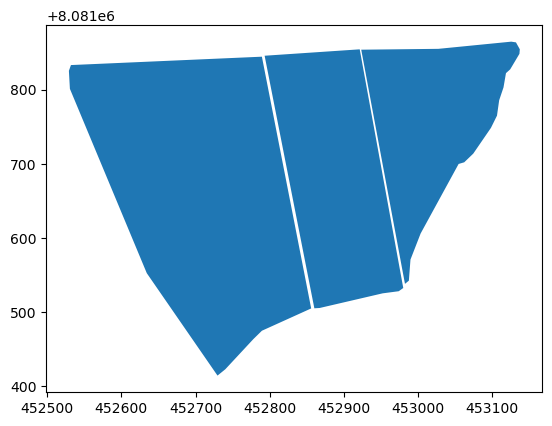

In [499]:
propiedad.plot()
plt.show()

In [500]:
propiedad.crs

<Projected CRS: EPSG:32720>
Name: WGS 84 / UTM zone 20S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 66°W and 60°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Falkland Islands (Malvinas). Paraguay.
- bounds: (-66.0, -80.0, -60.0, 0.0)
Coordinate Operation:
- name: UTM zone 20S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [501]:
propiedad = propiedad.to_crs(epsg=4326)

In [502]:
propiedad.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [503]:
file_name + '.geojson'

'22_EL_FAISAN_DEL_QUINACHI--LEANDRO_CABRERA.geojson'

In [504]:
os.chdir(r"D:\OneDrive - Ingenio Azucarero Guabira S.A\UTEA_2022\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\SPH_WGS84")

In [505]:
out_dir = os.path.normpath((os.getcwd() + '/' + file_name + '.geojson' ))

In [506]:
out_dir

'D:\\OneDrive - Ingenio Azucarero Guabira S.A\\UTEA_2022\\APP CAÑERO\\PROPIEDADES\\DATOS_PARA_GENERAR_GEOJSON\\SPH_WGS84\\22_EL_FAISAN_DEL_QUINACHI--LEANDRO_CABRERA.geojson'

In [507]:
propiedad.to_file(out_dir, driver='GeoJSON')